In [75]:
#I want to make sure I get all the libraries in here that I will need.
import numpy as np 
import pandas as pd 

import requests 

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import types

from sklearn.cluster import KMeans

print('All Systems Go...')

All Systems Go...


## Get Folium and Nominatim here

In [12]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: / 
  - anaconda/linux-64::ca-certificates-2020.1.1-0, anaconda/linux-64::openssl-1.1.1d-h7b6447c_4
  - anaconda/linux-64::openssl-1.1.1d-h7b6447c_4, defaults/linux-64::ca-certificates-2020.1.1-0
  - anaconda/linux-64::ca-certificates-2020.1.1-0, defaults/linux-64::openssl-1.1.1d-h7b6447c_4
  - defaults/linux-64::ca-certificates-2020.1.1-0, defaults/linux-64::openssl-1.1.1d-h7b6447cdone

# All requested packages already installed.

Solving environment: - 
  - anaconda/linux-64::ca-certificates-2020.1.1-0, anaconda/linux-64::openssl-1.1.1d-h7b6447c_4
  - anaconda/linux-64::ca-certificates-2020.1.1-0, defaults/linux-64::openssl-1.1.1d-h7b6447c_4
  - anaconda/linux-64::openssl-1.1.1d-h7b6447c_4, defaults/linux-64::ca-certificates-2020.1.1-0
  - defaults/linux-64::ca-certificates-2020.1.1-0, defaults/linux-64::openssl-1.1.1d-h7b6447cdone

# All requested packages already installed.



In [13]:
vbhoods = pd.read_csv("HRDF.csv")
vbhoods.head()

,Lat,Long,City,Neighborhood,Zillow Home Value,Month Over Month,Quarter Over Quarter,Year Over Year,5 Year Annualized,10 Year Annualized,Median Value/SQFT,Monthly +/- in MVSF,Quarterly +/- in MVSF,Yearly +/- in MVSF,Zillow Rent Index,Monthly +/- Rent,Quarterly +/- Rent,Yearly +/- Rent
0,36.910581,-76.056263,Virginia Beach City,Cape Story by the Sea,635900,0.007,0.017,0.043,0.02,0.004,271,0.004,0.015,0.042,---,---,---,---
1,36.878245,-76.026138,Virginia Beach City,Alanton,480900,0.007,0.020,0.048,0.024,0.011,1506,0.007,0.020,0.047,2193,-0.009,-0.021,0.047
2,36.865052,-76.124002,Virginia Beach City,Pembroke,316000,0.005,0.017,0.032,0.021,0.005,145,0.000,0.014,0.028,1826,0.009,0.011,0.03
3,36.863567,-76.087527,Virginia Beach City,Kings Grant,383100,0.004,0.013,0.031,0.016,0.009,849,0.004,0.013,0.032,1957,-0.004,-0.034,0.007
4,36.793428,-76.005317,Virginia Beach City,Macons Corner,236100,0.005,0.016,0.042,0.019,0.005,188,0.005,0.016,0.039,---,---,---,---


In [14]:
address = '310 Edwin Dr, Virginia Beach, VA 23462'

geolocator = Nominatim(user_agent="vb_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Virginia Beach, VA are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Virginia Beach, VA are 36.824994557635605, -76.13185019948901.


In [17]:
# create map of Va Beach using latitude and longitude values
map_vb = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(vbhoods['Lat'], vbhoods['Long'], vbhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='#78609e',
        fill=False,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vb)  
    
map_vb

In [18]:
CLIENT_ID = 'TVJWUE15PRCVHC0JWOGO0DQMGUJT11D0REZ04AJK1G2JZ3HY' # your Foursquare ID
CLIENT_SECRET = 'DQ2E1HBT4GPJVRIAURN04Q5VVAAVVDWSJNHYDPP4TJG5OKGI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TVJWUE15PRCVHC0JWOGO0DQMGUJT11D0REZ04AJK1G2JZ3HY
CLIENT_SECRET:DQ2E1HBT4GPJVRIAURN04Q5VVAAVVDWSJNHYDPP4TJG5OKGI


In [19]:
vbhoods.loc[1, 'Neighborhood']

'Alanton'

In [20]:
neighborhood_latitude = vbhoods.loc[2, 'Lat'] # neighborhood latitude value
neighborhood_longitude = vbhoods.loc[2, 'Long'] # neighborhood longitude value

neighborhood_name = vbhoods.loc[2, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Pembroke are 36.8650521869, -76.1240022262.


In [25]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url  

'https://api.foursquare.com/v2/venues/explore?&client_id=TVJWUE15PRCVHC0JWOGO0DQMGUJT11D0REZ04AJK1G2JZ3HY&client_secret=DQ2E1HBT4GPJVRIAURN04Q5VVAAVVDWSJNHYDPP4TJG5OKGI&v=20180605&ll=36.8650521869,-76.1240022262&radius=1000&limit=100'

In [26]:
#Here is where we will go ahead and make the pulls of data.  Lets make sure we are good here

In [27]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ec2852ffb34b5001b66cf65'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Pembroke Meadows',
  'headerFullLocation': 'Pembroke Meadows, Virginia Beach',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 16,
  'suggestedBounds': {'ne': {'lat': 36.87405219590001,
    'lng': -76.11277393214412},
   'sw': {'lat': 36.85605217789999, 'lng': -76.13523052025589}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b45560bf964a520d60a26e3',
       'name': 'Cinema Cafe',
       'location': {'address': '758 Independence Blvd',
        'crossStreet': 'at Pembroke Blvd',
        'lat': 36.86471515009411,
        'lng': -76.13116795676811,
    

In [28]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [29]:
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/sterling/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng
0,Cinema Cafe,Movie Theater,36.864715,-76.131168
1,Five Guys,Burger Joint,36.864139,-76.130976
2,Walgreens,Pharmacy,36.866056,-76.133014
3,Red Lobster,Seafood Restaurant,36.863187,-76.132716
4,7-Eleven,Convenience Store,36.863020,-76.131575


In [30]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

16 venues were returned by Foursquare.


In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
vb_venues = getNearbyVenues(names=vbhoods['Neighborhood'],
                                   latitudes=vbhoods['Lat'],
                                   longitudes=vbhoods['Long']
                                  )


Cape Story by the Sea
Alanton
Pembroke
Kings Grant
Macons Corner
Lynnhaven Shores
Acredale
Bay Colony
Sandbridge
First Landing State Park
Linkhorn Park
US Navy Little Creek Amphibious Base
Broad Bay Colony
Rudee Heights
Kempsville
Bayside
Seatack
Croatan Beach
Mears Corner
Princess Anne Plaza
Thalia
Oceana
The North End
Princess Anne
Dams Neck Naval Air Station
Thoroughgood
Naval Air Station Oceana
Chesapeake Beach
Chesapeake Beach
Great Neck
Green Run
Salem
Indian River
Great Bridge
Western Branch North
Butts Station
South Norfolk
South Norfolk
Deep Creek North
Great Bridge East
Western Branch South
Pleasant Grove West
Greenbrier West
Deep Creek South
Greenbrier East
Deep Creek West-Dismal Swamp
Pleasant Grove East
The Gardens
Edgewater
Camellia Gardens
Estabrook
Lochhaven
Bowling Green
West Ghent
Wards Corner
Wellington Oaks
Norview
Talbot Park
Glengariff
Lamberts Point
Greenhill Farms
Waverly on Broad Creek
Bolling Brook
River Point
Bel-Aire
Sherwood Forest
Highland Park
Poplar Hall

In [47]:
print(vb_venues.shape)
vb_venues.head(20)

(3356, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cape Story by the Sea,36.910581,-76.056263,First Landing State Park,36.917107,-76.052480,State / Provincial Park
1,Cape Story by the Sea,36.910581,-76.056263,First Landing Running/Bike Trail,36.912221,-76.066604,Trail
2,Cape Story by the Sea,36.910581,-76.056263,Surf Rider Marina Shores,36.905790,-76.063827,Seafood Restaurant
3,Cape Story by the Sea,36.910581,-76.056263,The Marina At Marina Shores,36.905548,-76.065381,Harbor / Marina
4,Cape Story by the Sea,36.910581,-76.056263,SUBWAY,36.911784,-76.066900,Sandwich Place
5,Cape Story by the Sea,36.910581,-76.056263,Redbox,36.911784,-76.066900,Video Store
6,Cape Story by the Sea,36.910581,-76.056263,Rite Aid,36.911956,-76.066437,Drugstore
7,Cape Story by the Sea,36.910581,-76.056263,Food Lion Grocery Store,36.912163,-76.067122,Supermarket
8,Cape Story by the Sea,36.910581,-76.056263,Kendall Street,36.916772,-76.058071,Beach
9,Cape Story by the Sea,36.910581,-76.056263,Surfrider,36.905855,-76.063868,Pub


In [51]:
venue_hist=vb_venues.groupby('Neighborhood').count()
venue_hist.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1, inplace=True)
venue_hist.head()

,Venue
Neighborhood,
Acredale,6
Alanton,4
Algonquin,5
Ballentine Place,15
Bay Colony,2


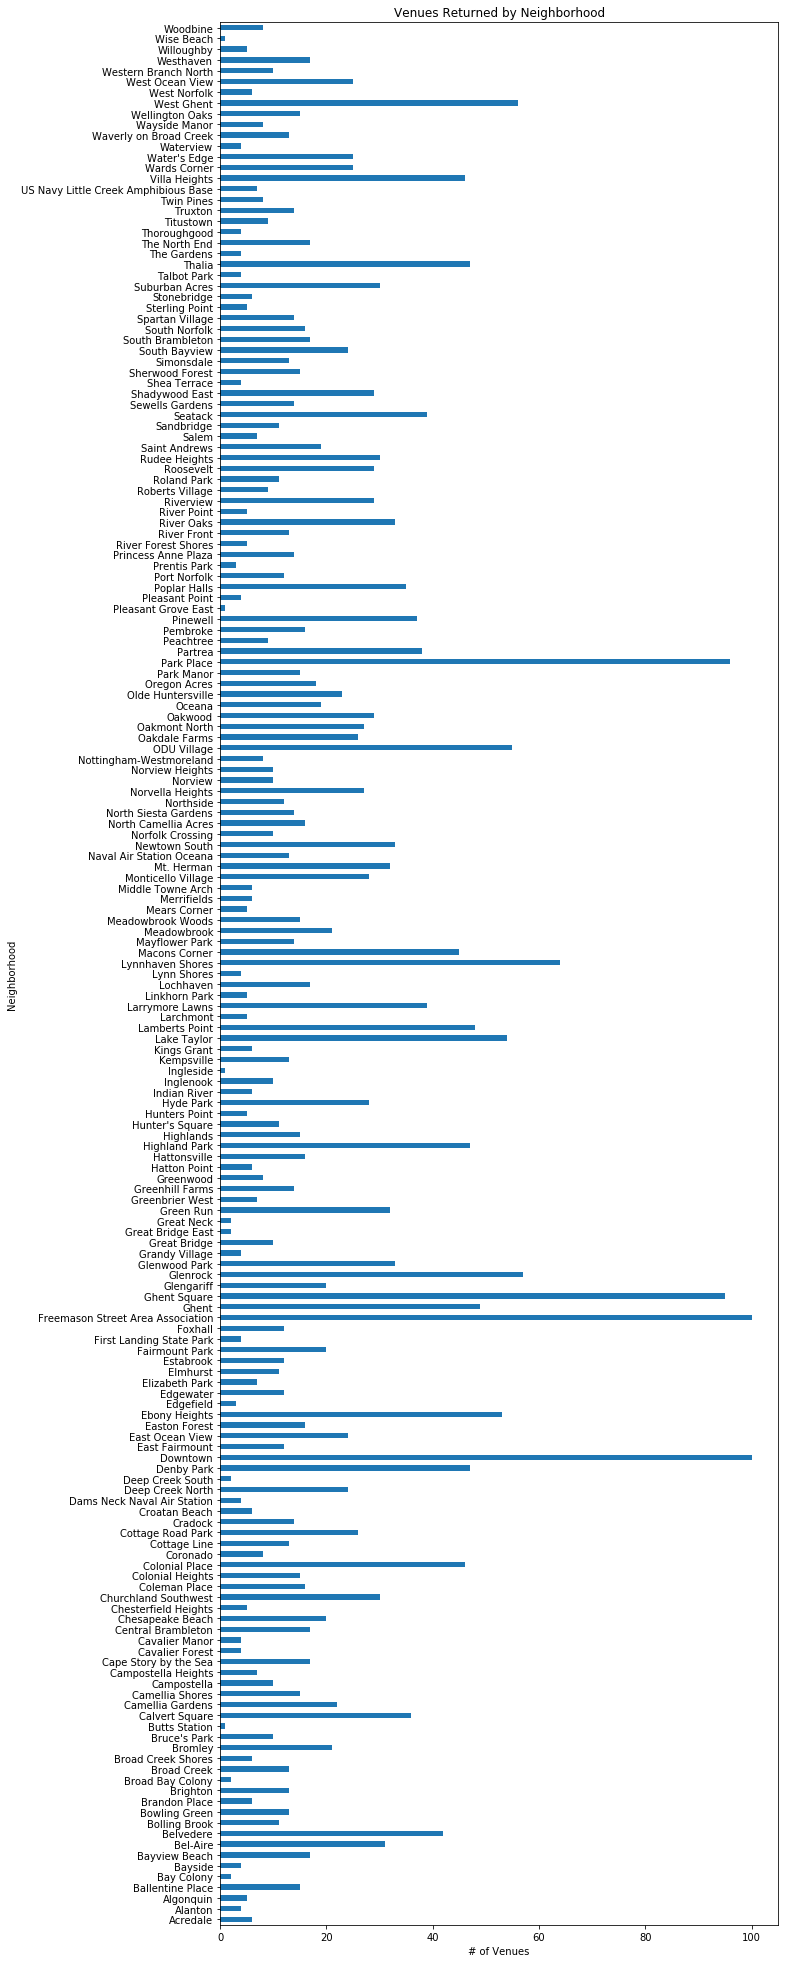

In [81]:
venue_hist['Venue'].plot(kind='barh', figsize=(10,35))

plt.title('Venues Returned by Neighborhood') # add a title to the histogram
plt.ylabel('Neighborhood') # add y-label
plt.xlabel('# of Venues') # add x-label
plt.savefig('venues-neighborhoods.png')

In [85]:
print('There are {} uniques categories.'.format(len(vb_venues['Venue Category'].unique())))

There are 280 uniques categories.


In [86]:
# one hot encoding
vb_onehot = pd.get_dummies(vb_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vb_onehot['Neighborhood'] = vb_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [vb_onehot.columns[-1]] + list(vb_onehot.columns[:-1])
vb_onehot = vb_onehot[fixed_columns]

vb_onehot.head()

,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Vietnamese Restaurant,Warehouse Store,Waterfront,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
vb_onehot.shape

(3356, 280)

In [88]:
vb_grouped = vb_onehot.groupby('Neighborhood').mean().reset_index()
vb_grouped

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Vietnamese Restaurant,Warehouse Store,Waterfront,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Acredale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alanton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Algonquin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ballentine Place,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bay Colony,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Western Branch North,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,Westhaven,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,Willoughby,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,Wise Beach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vb_groupedZ=vb_grouped.join()

In [162]:
num_top_venues = 5

for hood in vb_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = vb_grouped[vb_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acredale----
                        venue  freq
0  Construction & Landscaping  0.33
1                         Gym  0.17
2                        Park  0.17
3                        Pool  0.17
4           Food & Drink Shop  0.17


----Alanton----
               venue  freq
0               Pool  0.25
1         Sports Bar  0.25
2       Soccer Field  0.25
3               Food  0.25
4  Indian Restaurant  0.00


----Algonquin----
                venue  freq
0  Chinese Restaurant   0.4
1                Park   0.2
2         Pizza Place   0.2
3       Garden Center   0.2
4         Zoo Exhibit   0.0


----Ballentine Place----
               venue  freq
0  Convenience Store  0.20
1  Electronics Store  0.07
2              Diner  0.07
3      Grocery Store  0.07
4        Gas Station  0.07


----Bay Colony----
             venue  freq
0             Food   0.5
1  Harbor / Marina   0.5
2     Optical Shop   0.0
3           Office   0.0
4     Noodle House   0.0


----Bayside----
                 venu

In [163]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [164]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = vb_grouped['Neighborhood']

for ind in np.arange(vb_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vb_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Acredale,Construction & Landscaping,Pool,Food & Drink Shop,Gym,Park
1,Alanton,Sports Bar,Pool,Food,Soccer Field,Zoo
2,Algonquin,Chinese Restaurant,Pizza Place,Park,Garden Center,Farmers Market
3,Ballentine Place,Convenience Store,Community Center,Restaurant,Playground,Fried Chicken Joint
4,Bay Colony,Harbor / Marina,Food,Eye Doctor,Dumpling Restaurant,Eastern European Restaurant


In [167]:
# set number of clusters
kclusters = 6

vb_grouped_clustering = vb_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vb_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([5, 0, 3, 3, 0, 5, 3, 3, 5, 5, 3, 3, 3, 0, 3, 3, 3, 5, 0, 3, 3, 3,
       5, 5, 0, 5, 3, 3, 0, 5, 3, 3, 3, 3, 3, 3, 3, 3, 0, 4, 3, 3, 3, 3,
       3, 3, 5, 3, 0, 3, 5, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 5, 1, 1,
       3, 0, 5, 3, 5, 3, 3, 3, 5, 5, 3, 3, 5, 1, 3, 5, 3, 3, 5, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 5, 3,
       3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 2, 5, 3, 3, 3, 3, 5, 3, 3, 0,
       3, 3, 5, 3, 0, 3, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 5,
       3, 3, 4, 5, 3, 3, 3, 0, 3, 3, 3, 3, 5, 5, 3, 3, 0, 3, 3, 3, 4, 1,
       5], dtype=int32)

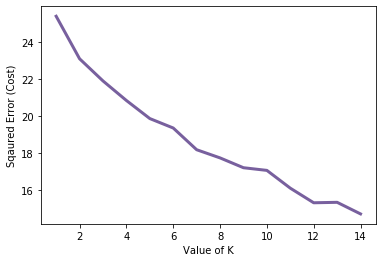

In [166]:
# Setting up Elbow Analysis
cost =[] 
for i in range(1, 15): 
	KM = KMeans(n_clusters = i, max_iter = 500) 
	KM.fit(vb_grouped_clustering) 
	
	# calculates squared error 
	# for the clustered points 
	cost.append(KM.inertia_)	 

# plot the cost against K values 
plt.plot(range(1, 15), cost, color ='#78609e', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

# the point of the elbow is the 
# most optimal value for choosing k 

In [153]:
#Hide this code when running a new pass
#vb_merged.drop(['Cluster Labels'], axis=1, inplace=True)
#vb_merged.head()

In [169]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

vb_merged = vbhoods

# merge to add latitude/longitude for each neighborhood
vb_merged = vb_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

vb_merged.head(50) # check the last rows!
vb_merged.sort_values(by="Cluster Labels")

,Lat,Long,City,Neighborhood,Zillow Home Value,Month Over Month,Quarter Over Quarter,Year Over Year,5 Year Annualized,10 Year Annualized,...,Zillow Rent Index,Monthly +/- Rent,Quarterly +/- Rent,Yearly +/- Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,36.910581,-76.056263,Virginia Beach City,Cape Story by the Sea,635900,0.007,0.017,0.043,0.02,0.004,...,---,---,---,---,0.0,Trail,Harbor / Marina,Construction & Landscaping,Video Store,State / Provincial Park
173,36.847520,-76.346675,Portsmouth City,Lynn Shores,180800,0.005,0.021,0.096,0.032,0.015,...,---,---,---,---,0.0,Auditorium,Baseball Field,Soccer Field,Deli / Bodega,Electronics Store
163,36.890175,-76.389677,Portsmouth City,Edgefield,229200,0.003,0.016,0.060,0.038,0.025,...,---,---,---,---,0.0,Trail,Ice Cream Shop,Nature Preserve,Zoo,Exhibit
97,36.863382,-76.347660,Portsmouth City,West Norfolk,159400,0.002,0.023,0.133,0.04,0.031,...,---,---,---,---,0.0,Boat or Ferry,Sandwich Place,Harbor / Marina,Fish Market,Financial or Legal Service
72,36.841350,-76.245710,Norfolk City,Grandy Village,145100,-0.004,-0.006,-0.001,-0.03,---,...,NaN,NaN,NaN,NaN,0.0,Light Rail Station,Seafood Restaurant,Performing Arts Venue,Exhibit,Dumpling Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,36.653547,-76.005716,Virginia Beach City,Princess Anne,350200,0.003,0.011,0.028,0.023,0.012,...,1895,0.002,-0.016,0.02,NaN,NaN,NaN,NaN,NaN,NaN
40,36.797316,-76.425862,Chesapeake City,Western Branch South,305700,0.005,0.013,0.039,0.025,0.008,...,1713,-0.006,-0.009,0.011,NaN,NaN,NaN,NaN,NaN,NaN
41,36.617803,-76.296487,Chesapeake City,Pleasant Grove West,427400,0.004,0.010,0.019,0.026,0.009,...,2180,-0.011,-0.027,-0.003,NaN,NaN,NaN,NaN,NaN,NaN
44,36.748931,-76.186476,Chesapeake City,Greenbrier East,297100,0.004,0.011,0.026,0.02,0.005,...,1733,-0.013,-0.014,0.005,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
print(vb_merged['Cluster Labels'].value_counts())

3.0    121
5.0     36
0.0     18
1.0      4
4.0      4
2.0      1
Name: Cluster Labels, dtype: int64


In [171]:
vb_null = vb_merged[vb_merged['Cluster Labels'].isnull()]
vb_null.shape

(5, 24)

In [158]:
vb_merged.sort_values(by="Cluster Labels")


,Lat,Long,City,Neighborhood,Zillow Home Value,Month Over Month,Quarter Over Quarter,Year Over Year,5 Year Annualized,10 Year Annualized,...,Quarterly +/- Rent,Yearly +/- Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,36.910581,-76.056263,Virginia Beach City,Cape Story by the Sea,635900,0.007,0.017,0.043,0.02,0.004,...,---,---,0.0,Trail,Harbor / Marina,Construction & Landscaping,Video Store,State / Provincial Park,Chinese Restaurant,Beach
173,36.847520,-76.346675,Portsmouth City,Lynn Shores,180800,0.005,0.021,0.096,0.032,0.015,...,---,---,0.0,Auditorium,Baseball Field,Soccer Field,Deli / Bodega,Electronics Store,Ethiopian Restaurant,Event Space
163,36.890175,-76.389677,Portsmouth City,Edgefield,229200,0.003,0.016,0.060,0.038,0.025,...,---,---,0.0,Trail,Ice Cream Shop,Nature Preserve,Zoo,Exhibit,Dumpling Restaurant,Eastern European Restaurant
97,36.863382,-76.347660,Portsmouth City,West Norfolk,159400,0.002,0.023,0.133,0.04,0.031,...,---,---,0.0,Boat or Ferry,Sandwich Place,Harbor / Marina,Fish Market,Financial or Legal Service,Fast Food Restaurant,Farmers Market
72,36.841350,-76.245710,Norfolk City,Grandy Village,145100,-0.004,-0.006,-0.001,-0.03,---,...,NaN,NaN,0.0,Light Rail Station,Seafood Restaurant,Performing Arts Venue,Exhibit,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,36.653547,-76.005716,Virginia Beach City,Princess Anne,350200,0.003,0.011,0.028,0.023,0.012,...,-0.016,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,36.797316,-76.425862,Chesapeake City,Western Branch South,305700,0.005,0.013,0.039,0.025,0.008,...,-0.009,0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,36.617803,-76.296487,Chesapeake City,Pleasant Grove West,427400,0.004,0.010,0.019,0.026,0.009,...,-0.027,-0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,36.748931,-76.186476,Chesapeake City,Greenbrier East,297100,0.004,0.011,0.026,0.02,0.005,...,-0.014,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
vb_merged.drop([23,40,41,44,45], inplace=True)
vb_merged.sort_values(by="Cluster Labels")

,Lat,Long,City,Neighborhood,Zillow Home Value,Month Over Month,Quarter Over Quarter,Year Over Year,5 Year Annualized,10 Year Annualized,...,Quarterly +/- Rent,Yearly +/- Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,36.910581,-76.056263,Virginia Beach City,Cape Story by the Sea,635900,0.007,0.017,0.043,0.02,0.004,...,---,---,0.0,Trail,Harbor / Marina,Construction & Landscaping,Video Store,State / Provincial Park,Chinese Restaurant,Beach
173,36.847520,-76.346675,Portsmouth City,Lynn Shores,180800,0.005,0.021,0.096,0.032,0.015,...,---,---,0.0,Auditorium,Baseball Field,Soccer Field,Deli / Bodega,Electronics Store,Ethiopian Restaurant,Event Space
163,36.890175,-76.389677,Portsmouth City,Edgefield,229200,0.003,0.016,0.060,0.038,0.025,...,---,---,0.0,Trail,Ice Cream Shop,Nature Preserve,Zoo,Exhibit,Dumpling Restaurant,Eastern European Restaurant
97,36.863382,-76.347660,Portsmouth City,West Norfolk,159400,0.002,0.023,0.133,0.04,0.031,...,---,---,0.0,Boat or Ferry,Sandwich Place,Harbor / Marina,Fish Market,Financial or Legal Service,Fast Food Restaurant,Farmers Market
72,36.841350,-76.245710,Norfolk City,Grandy Village,145100,-0.004,-0.006,-0.001,-0.03,---,...,NaN,NaN,0.0,Light Rail Station,Seafood Restaurant,Performing Arts Venue,Exhibit,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,36.900586,-76.299544,Norfolk City,Larchmont,392100,-0.001,0.000,0.009,0.01,0.001,...,NaN,NaN,5.0,Sandwich Place,IT Services,Diner,Park,River,Zoo,Event Space
57,36.904654,-76.283569,Norfolk City,Talbot Park,349600,0.005,0.008,0.031,0.004,0.001,...,NaN,NaN,5.0,Bus Stop,Gym,Park,Church,Exhibit,Dumpling Restaurant,Eastern European Restaurant
148,36.862815,-76.274551,Norfolk City,Olde Huntersville,126000,-0.008,-0.016,0.084,0.021,-0.023,...,NaN,NaN,5.0,Fast Food Restaurant,Home Service,Thrift / Vintage Store,Pool,Discount Store,Café,Bus Stop
123,36.901269,-76.254011,Norfolk City,Inglenook,163700,0.013,0.023,0.055,0.025,0.002,...,NaN,NaN,5.0,Home Service,Convenience Store,Dessert Shop,Food & Drink Shop,Video Store,Construction & Landscaping,Hobby Shop


In [161]:
# create map
#folium.TileLayer('MapQuest Open Aerial').add_to(map_clusters)
map_clusters = folium.Map(location=[latitude, longitude], tiles='stamenterrain', zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vb_merged['Lat'], vb_merged['Long'], vb_merged['Neighborhood'], vb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=False,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

In [177]:
vb_merged.sort_values(by="Month Over Month", ascending=False)

,Lat,Long,City,Neighborhood,Zillow Home Value,Month Over Month,Quarter Over Quarter,Year Over Year,5 Year Annualized,10 Year Annualized,...,Zillow Rent Index,Monthly +/- Rent,Quarterly +/- Rent,Yearly +/- Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
188,36.816715,-76.313086,Portsmouth City,Brighton,118000,0.028,0.072,0.220,0.034,0.009,...,---,---,---,---,3.0,Convenience Store,Department Store,Electronics Store,Fried Chicken Joint,Café
167,36.823499,-76.315447,Portsmouth City,Prentis Park,133000,0.024,0.065,0.237,0.066,0.013,...,1155,0,0.024,0.086,3.0,Deli / Bodega,Convenience Store,Discount Store,Fabric Shop,Electronics Store
184,36.841641,-76.325696,Portsmouth City,Shea Terrace,168700,0.015,0.041,0.102,0.031,0.017,...,---,---,---,---,3.0,Seafood Restaurant,Chinese Restaurant,Convenience Store,Pier,Drugstore
119,36.846597,-76.273982,Norfolk City,South Brambleton,94900,0.014,0.035,0.042,---,---,...,NaN,NaN,NaN,NaN,3.0,Light Rail Station,Home Service,Train Station,Plaza,Performing Arts Venue
123,36.901269,-76.254011,Norfolk City,Inglenook,163700,0.013,0.023,0.055,0.025,0.002,...,NaN,NaN,NaN,NaN,5.0,Home Service,Convenience Store,Dessert Shop,Food & Drink Shop,Video Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,36.829022,-76.267743,Norfolk City,Campostella,132300,-0.008,-0.015,0.015,0.028,---,...,NaN,NaN,NaN,NaN,5.0,Fast Food Restaurant,Park,Convenience Store,Pharmacy,Storage Facility
148,36.862815,-76.274551,Norfolk City,Olde Huntersville,126000,-0.008,-0.016,0.084,0.021,-0.023,...,NaN,NaN,NaN,NaN,5.0,Fast Food Restaurant,Home Service,Thrift / Vintage Store,Pool,Discount Store
161,36.817924,-76.337196,Portsmouth City,Truxton,111400,-0.009,-0.021,0.023,0.001,-0.009,...,---,---,---,---,3.0,Convenience Store,Video Store,Motorcycle Shop,Baseball Field,Seafood Restaurant
99,36.897382,-76.220483,Norfolk City,Bromley,197800,-0.011,-0.021,0.060,0.043,0.022,...,NaN,NaN,NaN,NaN,3.0,Discount Store,Italian Restaurant,Fast Food Restaurant,Convenience Store,Supermarket


In [227]:
#We will create dfs for each cluster so that we can study them in detail.
clus0=vb_merged.loc[vb_merged['Cluster Labels']== 0.0]


444083.3333333333


In [189]:
#clus2=vb_merged.loc[vb_merged['Cluster Labels']== 2.0]
clus2.drop([])
clus2

,Lat,Long,City,Neighborhood,Zillow Home Value,Month Over Month,Quarter Over Quarter,Year Over Year,5 Year Annualized,10 Year Annualized,...,Zillow Rent Index,Monthly +/- Rent,Quarterly +/- Rent,Yearly +/- Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
46,36.607169,-76.165492,Chesapeake City,Pleasant Grove East,434300,0.001,0.001,0.018,0.027,0.011,...,---,---,---,---,2.0,Gym,Zoo,Donut Shop,Dumpling Restaurant,Eastern European Restaurant


In [191]:
clus1=vb_merged.loc[vb_merged['Cluster Labels']== 1.0]
clus1

,Lat,Long,City,Neighborhood,Zillow Home Value,Month Over Month,Quarter Over Quarter,Year Over Year,5 Year Annualized,10 Year Annualized,...,Zillow Rent Index,Monthly +/- Rent,Quarterly +/- Rent,Yearly +/- Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
29,36.873688,-76.054086,Virginia Beach City,Great Neck,376800,0.004,0.013,0.033,0.023,0.009,...,1834,-0.015,-0.041,0.021,1.0,Construction & Landscaping,Park,Fishing Store,Fish Market,Financial or Legal Service
39,36.681471,-76.209293,Chesapeake City,Great Bridge East,361700,0.004,0.009,0.023,0.023,0.011,...,2047,0.001,0.004,0.039,1.0,Park,Jewelry Store,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
93,36.846743,-76.234498,Norfolk City,Ingleside,195400,0.004,0.005,0.011,0.037,-0.001,...,NaN,NaN,NaN,NaN,1.0,Park,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
160,36.849065,-76.362844,Portsmouth City,Wise Beach,272800,0.002,0.015,0.050,0.011,0.008,...,---,---,---,---,1.0,Park,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store


In [192]:
clus3=vb_merged.loc[vb_merged['Cluster Labels']== 3.0]
clus3

,Lat,Long,City,Neighborhood,Zillow Home Value,Month Over Month,Quarter Over Quarter,Year Over Year,5 Year Annualized,10 Year Annualized,...,Zillow Rent Index,Monthly +/- Rent,Quarterly +/- Rent,Yearly +/- Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,36.865052,-76.124002,Virginia Beach City,Pembroke,316000,0.005,0.017,0.032,0.021,0.005,...,1826,0.009,0.011,0.03,3.0,Cosmetics Shop,Chinese Restaurant,Supermarket,Pharmacy,Coffee Shop
4,36.793428,-76.005317,Virginia Beach City,Macons Corner,236100,0.005,0.016,0.042,0.019,0.005,...,---,---,---,---,3.0,Convenience Store,Pizza Place,Fast Food Restaurant,American Restaurant,Sushi Restaurant
5,36.912447,-76.073331,Virginia Beach City,Lynnhaven Shores,389600,0.004,0.014,0.037,0.019,0.005,...,1845,0.007,0.007,0.048,3.0,Beach,Seafood Restaurant,American Restaurant,Italian Restaurant,Pizza Place
10,36.859199,-76.002964,Virginia Beach City,Linkhorn Park,473000,0.004,0.015,0.042,0.024,0.006,...,1891,-0.006,-0.014,0.04,3.0,Italian Restaurant,Bakery,Thai Restaurant,Convenience Store,Fishing Store
14,36.829109,-76.169579,Virginia Beach City,Kempsville,241100,0.004,0.015,0.043,0.023,0.005,...,1496,0.006,0.008,0.017,3.0,Bar,BBQ Joint,Pizza Place,Southern / Soul Food Restaurant,Fried Chicken Joint
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,36.828581,-76.350621,Portsmouth City,Westhaven,156200,0.005,0.023,0.072,0.037,0.028,...,1166,0,-0.006,0.034,3.0,Convenience Store,Video Store,Bistro,American Restaurant,Sandwich Place
183,36.818978,-76.392950,Portsmouth City,Mayflower Park,202700,0.005,0.020,0.080,0.033,0.019,...,---,---,---,---,3.0,Fast Food Restaurant,Hot Dog Joint,Thrift / Vintage Store,Jewelry Store,Golf Course
184,36.841641,-76.325696,Portsmouth City,Shea Terrace,168700,0.015,0.041,0.102,0.031,0.017,...,---,---,---,---,3.0,Seafood Restaurant,Chinese Restaurant,Convenience Store,Pier,Drugstore
187,36.871232,-76.408782,Portsmouth City,Churchland Southwest,173800,0.012,0.032,0.088,0.048,0.035,...,---,---,---,---,3.0,Hotel,Fast Food Restaurant,Convenience Store,Breakfast Spot,Seafood Restaurant


In [200]:
clus4=vb_merged.loc[vb_merged['Cluster Labels']== 4.0]
clus4.head()

,Lat,Long,City,Neighborhood,Zillow Home Value,Month Over Month,Quarter Over Quarter,Year Over Year,5 Year Annualized,10 Year Annualized,...,Zillow Rent Index,Monthly +/- Rent,Quarterly +/- Rent,Yearly +/- Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,36.728938,-75.936980,Virginia Beach City,Sandbridge,682400,-0.001,-0.002,0.020,0.011,-0.002,...,3279,-0.005,-0.007,0.013,4.0,Beach,Resort,Speakeasy,Bar,Harbor / Marina
22,36.889339,-75.985791,Virginia Beach City,The North End,715500,0.002,0.009,0.026,0.017,0.002,...,2905,-0.005,-0.035,0.021,4.0,Beach,Spa,Seafood Restaurant,Historic Site,Hotel
24,36.784485,-75.958960,Virginia Beach City,Dams Neck Naval Air Station,284400,-0.002,0.005,0.002,0.017,0.011,...,---,---,---,---,4.0,Beach,Hotel,Bowling Alley,Zoo,Fabric Shop
140,36.965160,-76.280284,Norfolk City,Willoughby,224400,0.000,0.000,0.026,0.023,-0.012,...,NaN,NaN,NaN,NaN,4.0,Beach,Convenience Store,Harbor / Marina,Motel,Fishing Store


In [231]:
clus5=vb_merged.loc[vb_merged['Cluster Labels']== 5.0]
clus5.head()


,Lat,Long,City,Neighborhood,Zillow Home Value,Month Over Month,Quarter Over Quarter,Year Over Year,5 Year Annualized,10 Year Annualized,...,Zillow Rent Index,Monthly +/- Rent,Quarterly +/- Rent,Yearly +/- Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,36.863567,-76.087527,Virginia Beach City,Kings Grant,383100,0.004,0.013,0.031,0.016,0.009,...,1957,-0.004,-0.034,0.007,5.0,Playground,Gym,Farmers Market,Pool,Construction & Landscaping
6,36.802052,-76.154852,Virginia Beach City,Acredale,312200,0.004,0.014,0.039,0.025,0.01,...,1796,-0.002,0.01,0.05,5.0,Construction & Landscaping,Pool,Food & Drink Shop,Gym,Park
15,36.879455,-76.160277,Virginia Beach City,Bayside,237200,0.004,0.012,0.037,0.02,0.003,...,1473,0.01,0.002,0.013,5.0,Sporting Goods Shop,Golf Course,Jewelry Store,Business Service,Exhibit
18,36.790910,-76.190863,Virginia Beach City,Mears Corner,273800,0.004,0.014,0.040,0.023,0.008,...,1651,0.004,0.01,0.022,5.0,Home Service,Brewery,Lake,American Restaurant,Construction & Landscaping
25,36.895146,-76.117694,Virginia Beach City,Thoroughgood,395000,0.001,0.006,0.024,0.023,0.01,...,2019,-0.01,-0.02,0.046,5.0,Park,History Museum,Disc Golf,Gym,Exhibit


In [230]:
print("The Rec Areas have a ZHV of ",clus0["Zillow Home Value"].mean(skipna=True))
print("Eastern Euro Areas have a ZHV of ",clus1["Zillow Home Value"].mean(skipna=True))
print("Outlier has a ZHV of ",clus2["Zillow Home Value"].mean(skipna=True))
print("Strip Mall cluster has a ZHV of ",clus3["Zillow Home Value"].mean(skipna=True))
print("Beach Neighborhoods have a ZHV of ",clus4["Zillow Home Value"].mean(skipna=True))
print("Residential Areas has a ZHV of ",clus5["Zillow Home Value"].mean(skipna=True))

The Rec Areas have a ZHV of  444083.3333333333
Eastern Euro Areas have a ZHV of  301675.0
Outlier has a ZHV of  434300.0
Strip Mall cluster has a ZHV of  219742.97520661156
Beach Neighborhoods have a ZHV of  476675.0
Residential Areas has a ZHV of  246850.0


In [232]:
print("The Rec Areas have a Yearly Growth Rate of ",clus0["Year Over Year"].mean(skipna=True))
print("Eastern Euro Areas have a Yearly Growth Rate of ",clus1["Year Over Year"].mean(skipna=True))
print("Outlier has a Yearly Growth Rate of ",clus2["Year Over Year"].mean(skipna=True))
print("Strip Mall cluster has a Yearly Growth Rate of ",clus3["Year Over Year"].mean(skipna=True))
print("Beach Neighborhoods have Yearly Growth Rate of ",clus4["Year Over Year"].mean(skipna=True))
print("Residential Areas has a Yearly Growth Rate of ",clus5["Year Over Year"].mean(skipna=True))

The Rec Areas have a Yearly Growth Rate of  0.04066666666666667
Eastern Euro Areas have a Yearly Growth Rate of  0.02925
Outlier has a Yearly Growth Rate of  0.018000000000000002
Strip Mall cluster has a Yearly Growth Rate of  0.04338016528925621
Beach Neighborhoods have Yearly Growth Rate of  0.018500000000000003
Residential Areas has a Yearly Growth Rate of  0.029055555555555564


In [276]:
data = {'Cluster Label': [0,1,3,4,5], 'Cluster Alias': ['Recreational Area', 'Eastern European Area', 'Strip Mall Area', 'Beach Areas', 'Residential Areas'], 'Mean Zillow Home Value':[444083,301675,219742,476675,246850]}
mean_ZHV=pd.DataFrame.from_dict(data)
mean_ZHV.head()

,Cluster Label,Cluster Alias,Mean Zillow Home Value
0,0,Recreational Area,444083
1,1,Eastern European Area,301675
2,3,Strip Mall Area,219742
3,4,Beach Areas,476675
4,5,Residential Areas,246850


In [279]:
#mean_ZHV.drop(['Cluster Label'], axis=1, inplace=True)
mean_ZHV=mean_ZHV.set_index('Cluster Label')
mean_ZHV.head()

,Cluster Alias,Mean Zillow Home Value
Cluster Label,,
0,Recreational Area,444083
1,Eastern European Area,301675
3,Strip Mall Area,219742
4,Beach Areas,476675
5,Residential Areas,246850


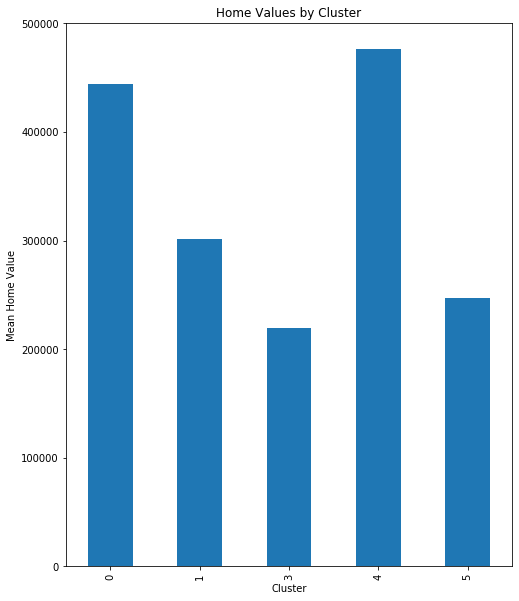

In [284]:
mean_ZHV['Mean Zillow Home Value'].plot(kind='bar', figsize=(8,10))

plt.title('Home Values by Cluster') # add a title to the histogram
plt.ylabel('Mean Home Value') # add y-label
plt.xlabel('Cluster') # add x-label
plt.savefig('Home Values By Cluster.png')

In [281]:
#Lets do the chart on the home value growth now.

data = {'Cluster Label': [0,1,3,4,5], 'Cluster Alias': ['Recreational Area', 'Eastern European Area', 'Strip Mall Area', 'Beach Areas', 'Residential Areas'], 'Year Over Year Growth (%)':[.0406,.0293,.0434,.0185,.0291]}
mean_growth=pd.DataFrame.from_dict(data)
mean_growth.head()

,Cluster Label,Cluster Alias,Year Over Year Growth (%)
0,0,Recreational Area,0.0406
1,1,Eastern European Area,0.0293
2,3,Strip Mall Area,0.0434
3,4,Beach Areas,0.0185
4,5,Residential Areas,0.0291


In [270]:
mean_growth['Year Over Year Growth (%)']=100*mean_growth['Year Over Year Growth (%)']
mean_growth.head()

,Cluster Label,Cluster Alias,Year Over Year Growth (%)
0,0,Recreational Area,4.06
1,1,Eastern European Area,2.93
2,3,Strip Mall Area,4.34
3,4,Beach Areas,1.85
4,5,Residential Areas,2.91


In [282]:
mean_growth=mean_growth.set_index('Cluster Label')
mean_growth.head()

,Cluster Alias,Year Over Year Growth (%)
Cluster Label,,
0,Recreational Area,0.0406
1,Eastern European Area,0.0293
3,Strip Mall Area,0.0434
4,Beach Areas,0.0185
5,Residential Areas,0.0291


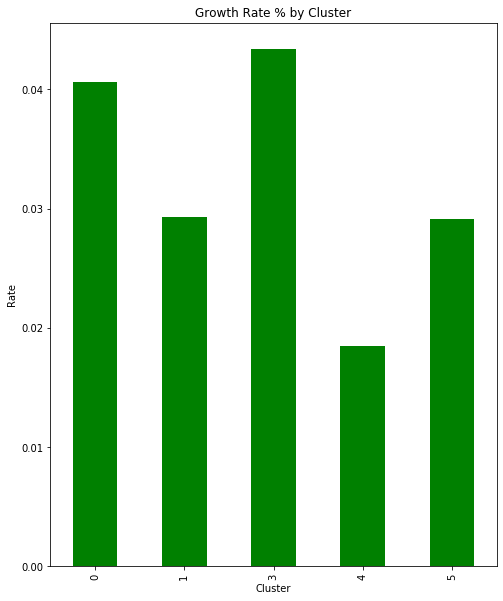

In [283]:
mean_growth['Year Over Year Growth (%)'].plot(kind='bar', color='green', figsize=(8,10))

plt.title('Growth Rate % by Cluster') # add a title to the histogram
plt.ylabel('Rate') # add y-label
plt.xlabel('Cluster') # add x-label
plt.savefig('Growth Rate By Cluster.png')